In [93]:
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import Chem


In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from rdkit import Chem
# from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
# from gensim.models import word2vec


In [95]:
m1 = Chem.MolFromSmiles('CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC')
m2 = Chem.MolFromSmiles('CCN(CC)CCOCCOC(=O)C1(CCCC1)C2=CC=CC=C2')
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024, useFeatures=True)
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,2,nBits=1024, useFeatures=True)
# dir(fp1)
# print(fp1.ToList())
# print(fp2.ToList())

# sum(np.array(fp1.ToList()) - np.array(fp2.ToList()))

In [96]:
df = pd.read_csv("basic_data.csv")
df.head()
df.columns

Index(['cid', 'smiles', 'action', 'action_gen'], dtype='object')

In [97]:
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

morgan_FP = []

for mol in df['mol']:
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024, useFeatures=True)
    morgan_FP.append(fp1.ToList())

df_morgan_FP = pd.DataFrame(morgan_FP)
df_morgan_FP

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
167,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
168,1,1,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
169,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [98]:
df_test = pd.concat([df, df_morgan_FP], axis=1)
df_test.set_index('cid', inplace=True)
df_test.to_csv('morgan_fingeprint.csv')

In [99]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import rand_score

In [100]:
# pair_rand_score = []
# n_comp = range(2, 100)
# for comp in n_comp: 
#     svd = TruncatedSVD(n_components=comp, n_iter=7, random_state=42)
#     df_trans = svd.fit_transform(df_morgan_FP)

#     # trunc_results = pd.DataFrame(df_trans, columns=['trunc' + str(i) for i in range(1, comp + 1)])
#     trunc_results = pd.DataFrame(df_trans)

#     clustering_kmeans = KMeans(n_clusters=4)
#     trunc_results['clusters'] = clustering_kmeans.fit_predict(trunc_results)

#     cluster_dict = dict(trunc_results['clusters'].value_counts())
#     cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
#     cluster_dict = list(cluster_dict)

#     trunc_results['action_gen'] = df['action_gen']
#     trunc_results['action_gen_cluster'] = trunc_results['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'PARTIAL AGONIST', cluster_dict[3]: 'OTHER'})

#     # rd_sc = rand_score(df.action_gen, trunc_results.clusters)
#     c_rpt = classification_report(trunc_results.action_gen, trunc_results.action_gen_cluster, output_dict=True)
#     total_score = sum([c_rpt[key]['precision'] for key in list(c_rpt.keys())[:4]])
#     pair_rand_score.append(total_score)

# sns.lineplot(n_comp, pair_rand_score)
# plt.grid()
# plt.show()


## Truncated SVD

In [101]:
n_comp = 50
svd = TruncatedSVD(n_components=n_comp, n_iter=7, random_state=42)
df_trans = svd.fit_transform(df_morgan_FP)

trunc_results = pd.DataFrame(df_trans, columns=['trunc' + str(i) for i in range(1, n_comp + 1)])

# sns.scatterplot(x='trunc1', y="trunc2", hue=df['action_gen'], data=trunc_results)
# plt.title('Clusters on PCA with actual values')
# plt.show()


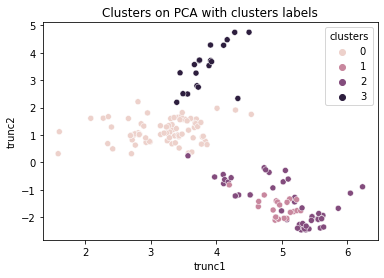

In [102]:
clustering_kmeans = KMeans(n_clusters=4)
trunc_results['clusters'] = clustering_kmeans.fit_predict(trunc_results)
trunc_results['clusters'].value_counts()

sns.scatterplot(x="trunc1", y="trunc2", hue=trunc_results['clusters'], data=trunc_results)
plt.title('Clusters on PCA with clusters labels')
plt.show()

In [103]:
print(trunc_results['clusters'].value_counts())
# sort keys based on number of values in each clusters
cluster_dict = dict(trunc_results['clusters'].value_counts())
cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
cluster_dict = list(cluster_dict)

trunc_results['action_gen'] = df['action_gen']
trunc_results['action_gen_cluster'] = trunc_results['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'PARTIAL AGONIST', cluster_dict[3]: 'OTHER'})

print('pairing_score: ', rand_score(trunc_results.action_gen, trunc_results.action_gen_cluster))
trunc_results[trunc_results.action_gen == trunc_results.action_gen_cluster].shape[0] / trunc_results.shape[0]
# print('Accuracy', accuracy_score(trunc_results.action_gen, trunc_results.action_gen_cluster))
print(classification_report(trunc_results.action_gen, trunc_results.action_gen_cluster))


0    82
2    49
1    21
3    19
Name: clusters, dtype: int64
pairing_score:  0.5850017199862401
                 precision    recall  f1-score   support

        AGONIST       0.77      0.58      0.66       108
     ANTAGONIST       0.59      0.67      0.63        43
          OTHER       0.00      0.00      0.00         9
PARTIAL AGONIST       0.00      0.00      0.00        11

       accuracy                           0.54       171
      macro avg       0.34      0.31      0.32       171
   weighted avg       0.63      0.54      0.58       171



## Trunc + LDA

c:\Users\fongm\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


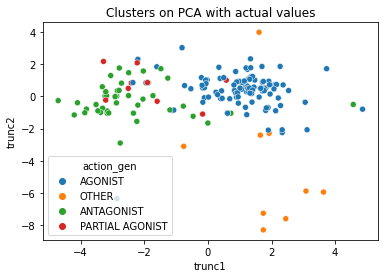

In [116]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
df_morganFP_trunc = svd.fit_transform(df_morgan_FP)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

np.random.seed(42)
df_morganFP_trunc_scaled = df_morganFP_trunc
scaler = StandardScaler()
df_morganFP_trunc_scaled = pd.DataFrame(scaler.fit_transform(df_morganFP_trunc))
df_morganFP_trunc_scaled['action_gen'] = df['action_gen']


# normal LDA 
n_comp = 2
# lda = LDA(n_components=n_comp).fit(df_morganFP_trunc_scaled.iloc[:, :-1], df_morganFP_trunc_scaled.iloc[:, -1])

# normal LDA with partial training set to prevent overfitting
# df_sample = df_morganFP_trunc_scaled.sample(n=140)
# lda = LDA(n_components=n_comp).fit(df_sample.iloc[:, :-1], df_sample.iloc[:, -1])

# solve generalized eigenvalue problem
X_train, X_test, y_train, y_test = train_test_split(df_morganFP_trunc_scaled.iloc[:, :-1], df_morganFP_trunc_scaled.iloc[:, -1], 
                                                train_size=0.6, random_state=42)
lda = LDA(n_components=n_comp, solver='eigen', shrinkage=0.1).fit(X_train, y_train)

df_morganFP_trunc_scaled.drop("action_gen", axis=1, inplace=True)
lda_results = lda.transform(df_morganFP_trunc_scaled)

lda_results = pd.DataFrame(lda_results, columns=['trunc' + str(i) for i in range(1, n_comp+1)])
sns.scatterplot(x='trunc1', y="trunc2", hue=df['action_gen'], data=lda_results)
plt.title('Clusters on PCA with actual values')
plt.show()


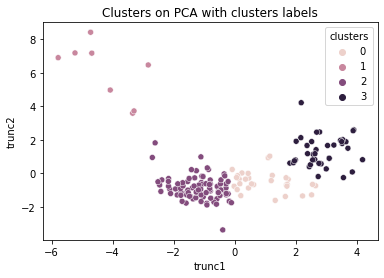

In [114]:
clustering_kmeans = KMeans(n_clusters=4)
lda_results['clusters'] = clustering_kmeans.fit_predict(lda_results)
lda_results['clusters'].value_counts()

sns.scatterplot(x="trunc1", y="trunc2", hue=lda_results['clusters'], data=lda_results)
plt.title('Clusters on PCA with clusters labels')
plt.show()

In [115]:
print(lda_results['clusters'].value_counts())
# sort keys based on number of values in each clusters
cluster_dict = dict(lda_results['clusters'].value_counts())
cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
cluster_dict = list(cluster_dict)

lda_results['action_gen'] = df['action_gen']
lda_results['action_gen_cluster'] = lda_results['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'PARTIAL AGONIST', cluster_dict[3]: 'OTHER'})

print('pairing_score: ', rand_score(lda_results.action_gen, lda_results.action_gen_cluster))
lda_results[lda_results.action_gen == lda_results.action_gen_cluster].shape[0] / lda_results.shape[0]
# print('Accuracy', accuracy_score(lda_results.action_gen, lda_results.action_gen_cluster))
print(classification_report(lda_results.action_gen, lda_results.action_gen_cluster))


2    93
3    39
0    31
1     8
Name: clusters, dtype: int64
pairing_score:  0.823735810113519
                 precision    recall  f1-score   support

        AGONIST       0.98      0.84      0.91       108
     ANTAGONIST       0.87      0.79      0.83        43
          OTHER       1.00      0.89      0.94         9
PARTIAL AGONIST       0.19      0.55      0.29        11

       accuracy                           0.81       171
      macro avg       0.76      0.77      0.74       171
   weighted avg       0.90      0.81      0.85       171



## Truncated SVD + TSNE

c:\Users\fongm\Anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\fongm\Anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


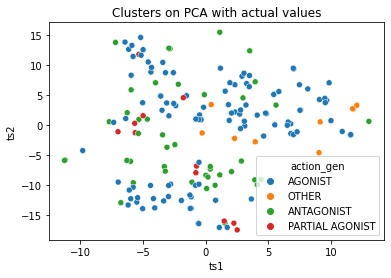

In [107]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
df_trans = svd.fit_transform(df_morgan_FP)
# df_trans

# scaler = StandardScaler()
# df_trans_scaled = scaler.fit_transform(df_trans)

tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_trans)

tsne_results = pd.DataFrame(tsne_results, columns=['ts1', 'ts2'])
sns.scatterplot(x='ts1', y="ts2", hue=df['action_gen'], data=tsne_results)
plt.title('Clusters on PCA with actual values')
plt.show()

In [108]:
clustering_kmeans = KMeans(n_clusters=4)
df_morgan_FP['clusters'] = clustering_kmeans.fit_predict(df_morgan_FP)
df_morgan_FP['clusters'].value_counts()



3    88
2    48
1    21
0    14
Name: clusters, dtype: int64

In [109]:
# df_morgan_FP['action_gen'] = df['action_gen']
# print('pairing_score: ', rand_score(df_morgan_FP.action_gen, df_morgan_FP.clusters))